In [1]:
import tensorflow as tf
import numpy as np
import tools._my_tools as mt
import tools._dataset_tools as dt
import cv2 as cv
import os
import glob

In [3]:
import getopt

In [2]:
ytest = np.load("datasets/dataset_interpolation_96/y_test.npy")

In [5]:
print(ytest.shape)
print(np.max(ytest))
print(np.min(ytest))

(49958, 96, 96)
255
0


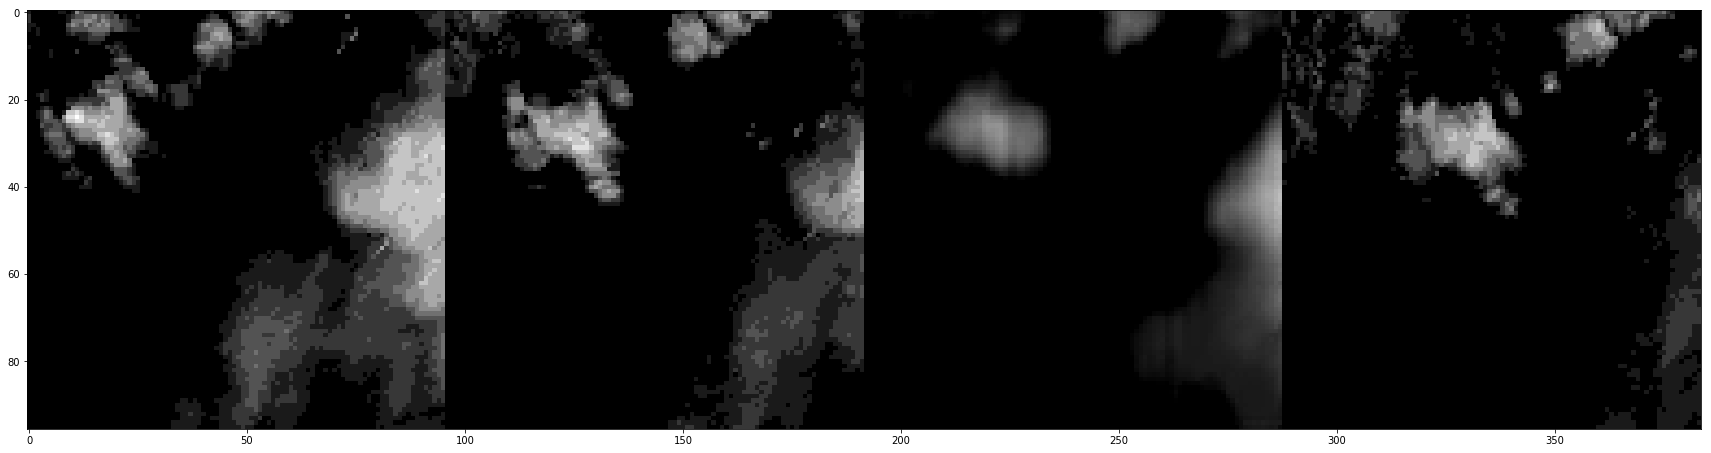

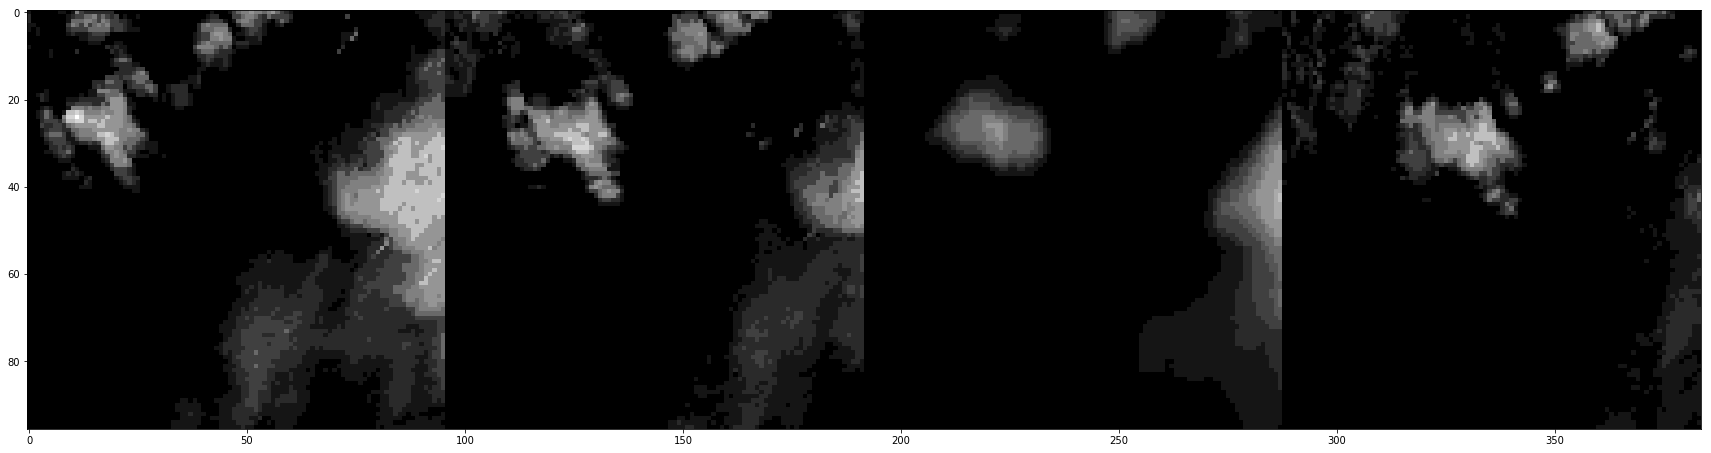

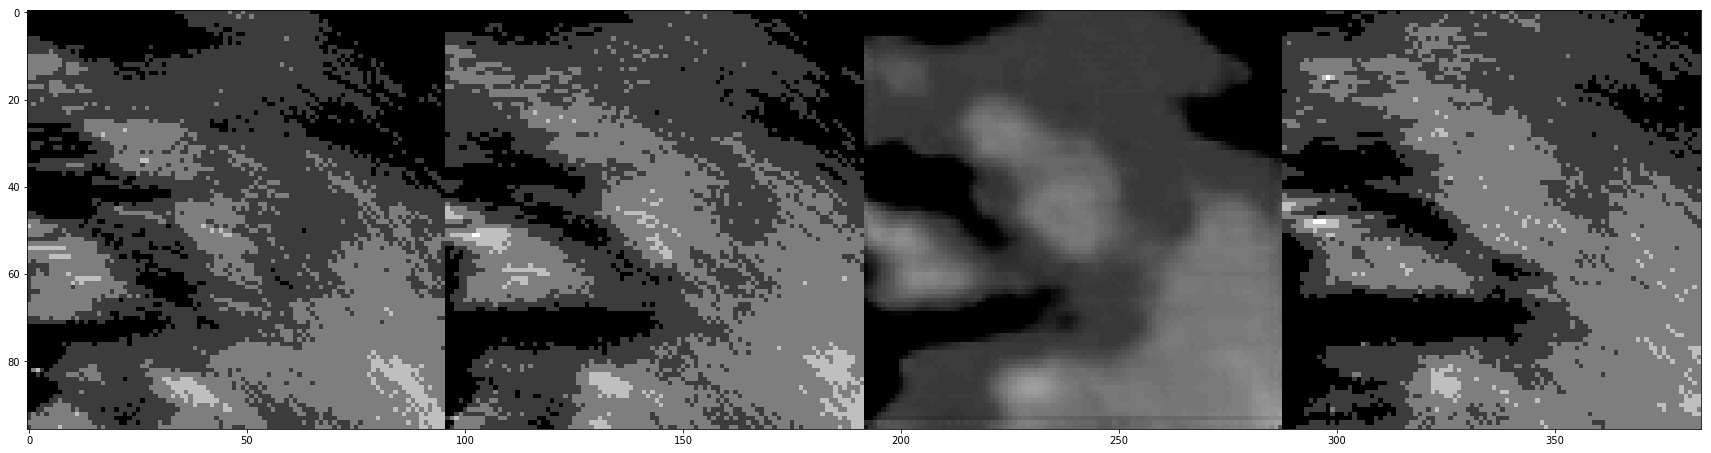

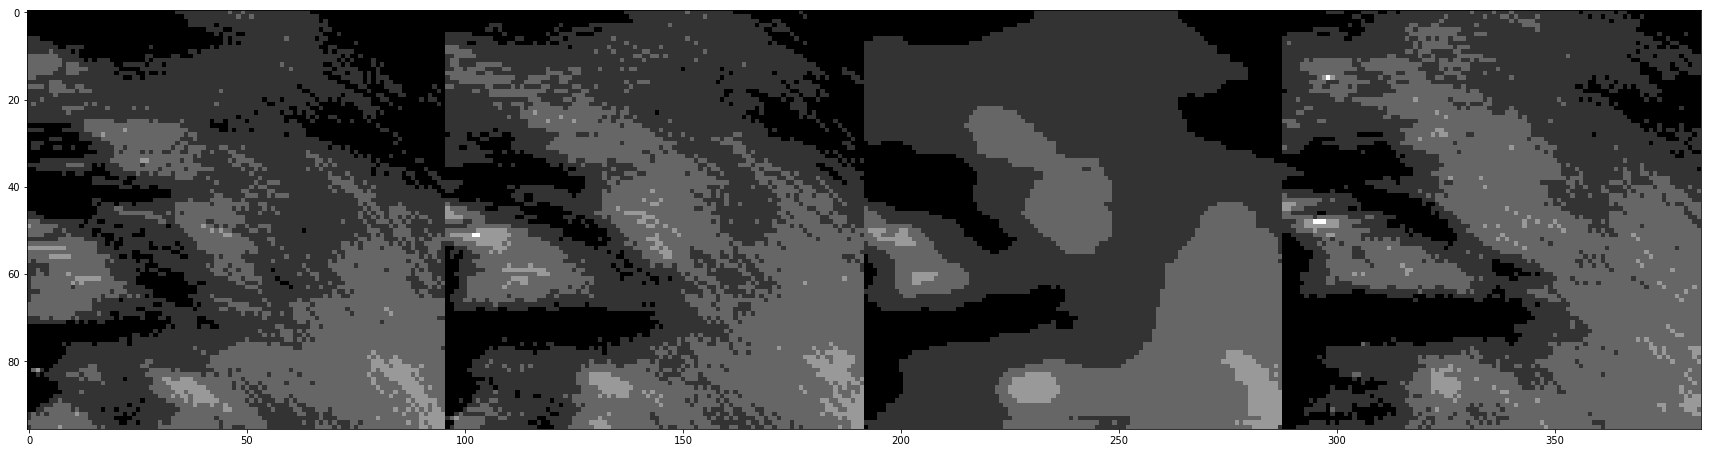

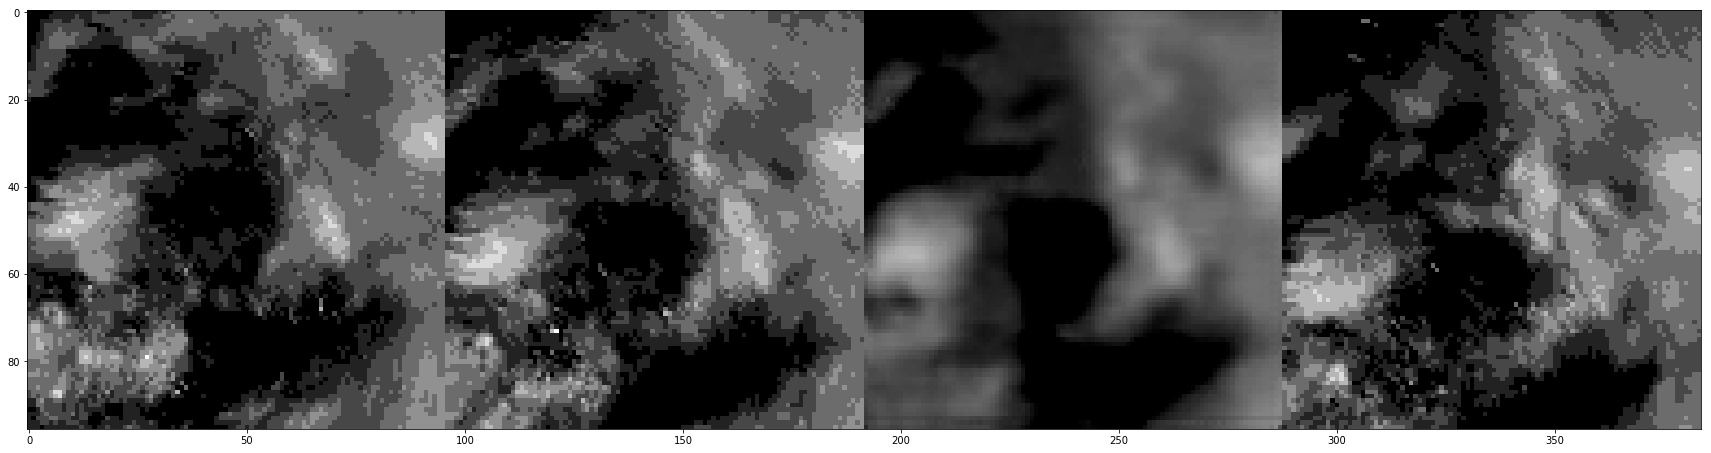

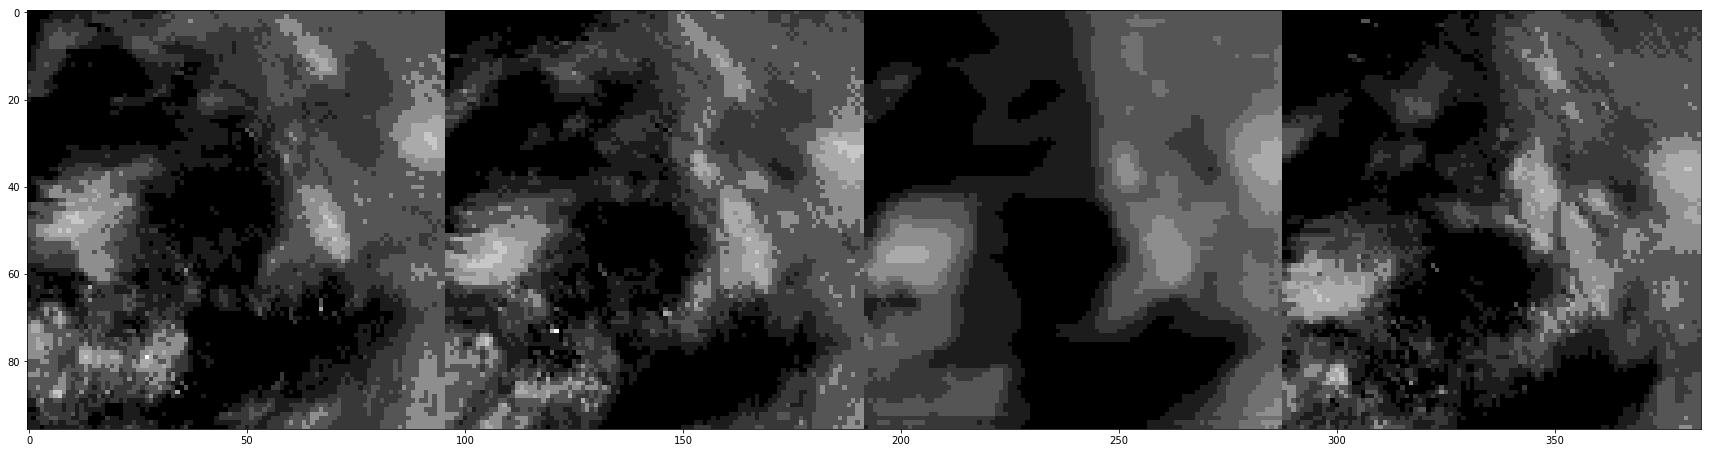

In [2]:
figs = sorted(glob.glob("09/01/*.png"))

for fig in figs:
    img = cv.imread(fig,cv.IMREAD_GRAYSCALE)
    mt.showImgGC("",img)
#     a = mt.postProcess(img,16)
#     print(img)
#     print(a)
#     print("------------")
    
    mt.showImgGC("",mt.postProcess(img,16,bound=255))

In [9]:
figs

['09/02_sigmoid/00.png',
 '09/02_sigmoid/01.png',
 '09/02_sigmoid/02.png',
 '09/02_sigmoid/03.png',
 '09/02_sigmoid/04.png',
 '09/02_sigmoid/05.png',
 '09/02_sigmoid/06.png',
 '09/02_sigmoid/07.png',
 '09/02_sigmoid/08.png',
 '09/02_sigmoid/09.png']

In [29]:
sess = tf.Session()
vec = tf.constant([0.032, 0.083,0.09999, 0.132])
tmp = tf.math.scalar_mul(30,vec)
a = tf.math.floor(tmp)
b = tf.math.ceil(tmp)
res = tf.math.divide(tf.math.floordiv(tf.math.add(a,b),3),15)
print(sess.run(vec))
print(sess.run(tmp))
print(sess.run(a))
print(sess.run(b))
print(sess.run(res))

[0.032   0.083   0.09999 0.132  ]
[0.96000004 2.49       2.9997     3.96      ]
[0. 2. 2. 3.]
[1. 3. 3. 4.]
[0.         0.06666667 0.06666667 0.13333334]


In [9]:
folder = "interpolation_script/examples/"

i1 = cv.imread(folder+"05_1.png",cv.IMREAD_GRAYSCALE)
i1 = dt.cropImg(i1,0,0,(256,256))
mt.showImg("",i1,folder=folder+"06_1")

In [3]:
import numpy as np

a = np.array([[[[1,2,3],[4,5,6],[7,8,9]],[[1,2,3],[4,5,6],[7,8,9]]]])
print(a.shape)
a = a.reshape((-1,1,3,3))
# b = np.concatenate((a[:,0:1,:,:],a[:,1:2,:,:]),axis=0)
print(a.shape)

(1, 2, 3, 3)
(2, 1, 3, 3)


In [1]:
a = [1,2,3]
x,y,z = a
print(x,y,z)

1 2 3


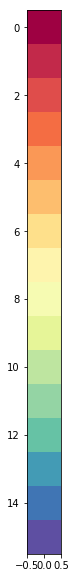

In [20]:
import matplotlib.pyplot as plt

l = np.array(range(16)).reshape((16,1))

cs = cv.imread("tmp/colorspace.png",cv.IMREAD_UNCHANGED)
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(False)
ax.imshow(l, cmap='Spectral')
# cs

In [23]:
cs[0,0]=[169,169,169,255]
cs

array([[[169, 169, 169, 255],
        [112,   0,  56, 255],
        [168,   0,  48, 255],
        [252,   0,   0, 255],
        [192, 108,   0, 255],
        [  0, 160,   0, 255],
        [  0, 188,   0, 255],
        [  0, 216,  52, 255],
        [  0, 220, 156, 255],
        [  0, 220, 224, 255],
        [  0, 176, 252, 255],
        [  0, 132, 252, 255],
        [  0,  88, 252, 255],
        [  0,   0, 252, 255],
        [  0,   0, 160, 255],
        [252, 252, 252, 255]]], dtype=uint8)

In [24]:
cv.imwrite("tmp/cs"+".png",cs)

True

In [28]:
in_f = "datasets/cropped_seq_6/loaded/"
X = np.load(in_f+"0_X.npy")
y = np.load(in_f+"0_y.npy")
mt.showImg("",X[0,0,:,:],X[0,1,:,:],X[0,2,:,:],y[0,0,:,:],y[0,1,:,:],y[0,2,:,:])

### Autoencoder Test

In [22]:
import models.autoencoder as AE
import torch

ae = AE.Model("models/data/autoencoder.pth")

In [15]:
data_f = "datasets/dataset_extrapolation/"
X_val, y_val = mt.load([data_f+"X_val.npy", data_f+"y_val.npy"],typeF='float32')
# X_val = mt.load([data_f+"X_val.npy"],typeF='float32')[0]

Loading datasets/dataset_extrapolation/X_val.npy
Loading datasets/dataset_extrapolation/y_val.npy


In [10]:
print(X_val[0:1,1:2,:,:].shape)
print(y_val[0:1,0:1,:,:].shape)

(1, 1, 96, 96)
(1, 1, 96, 96)


(96, 192)


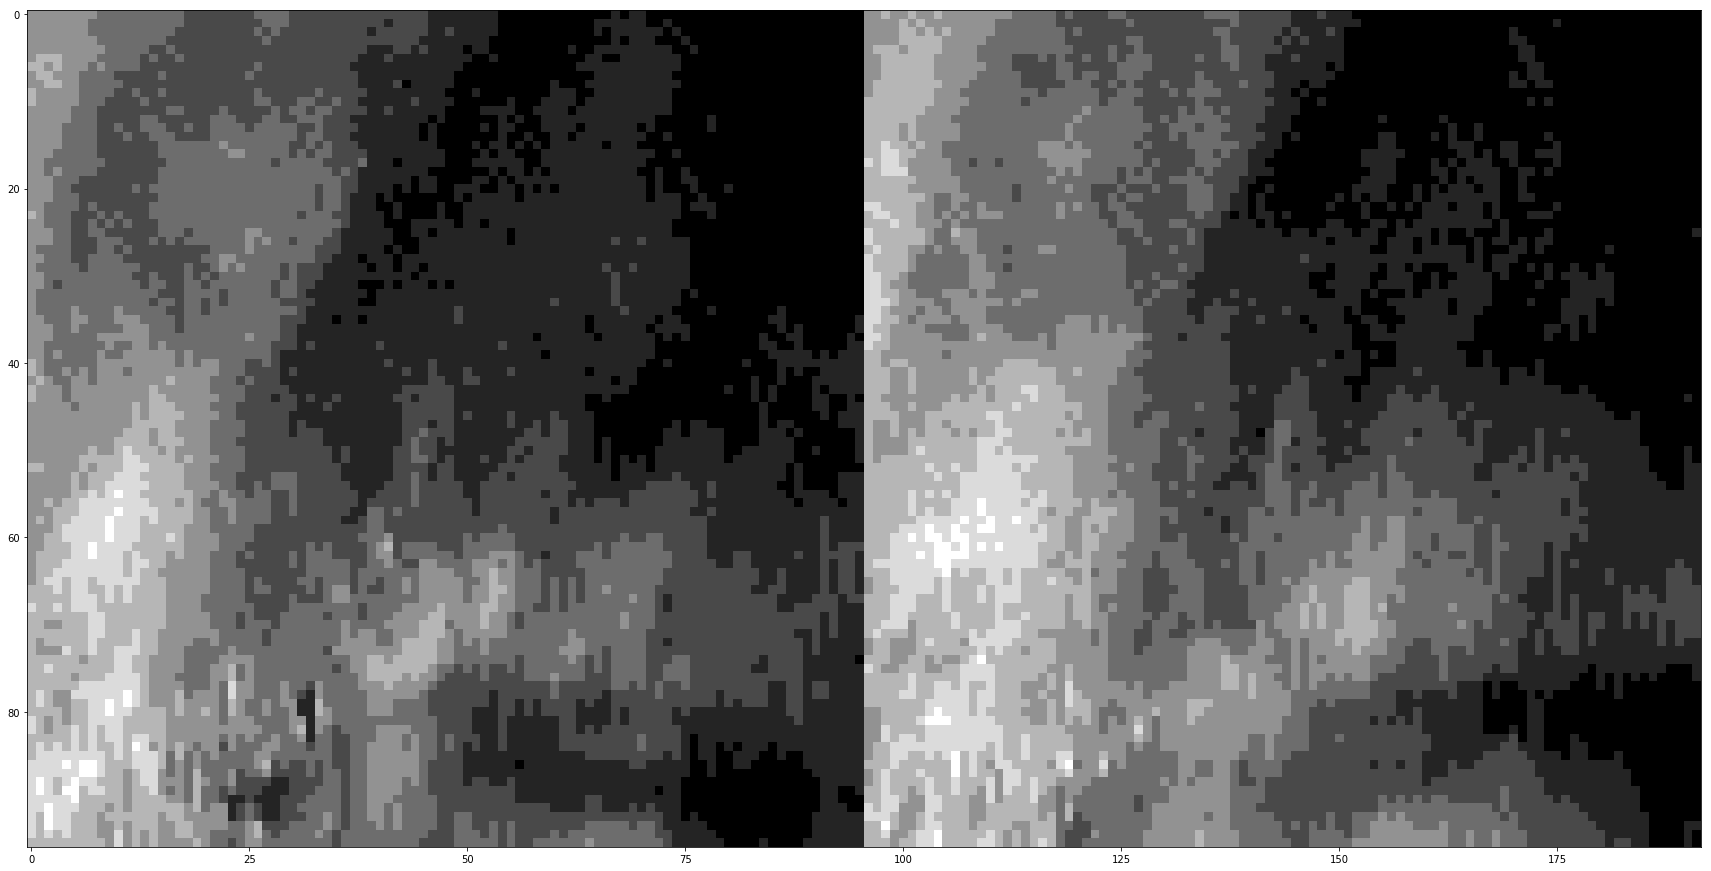

In [17]:
mt.showImgGC("",X_val[0,2,:,:],y_val[0,0,:,:])

In [26]:
ae.eval()
en = ae.encode(torch.tensor(X_val[0:1,2:,:,:]))
de = ae.decode(en)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))


(1, 1, 96, 96)


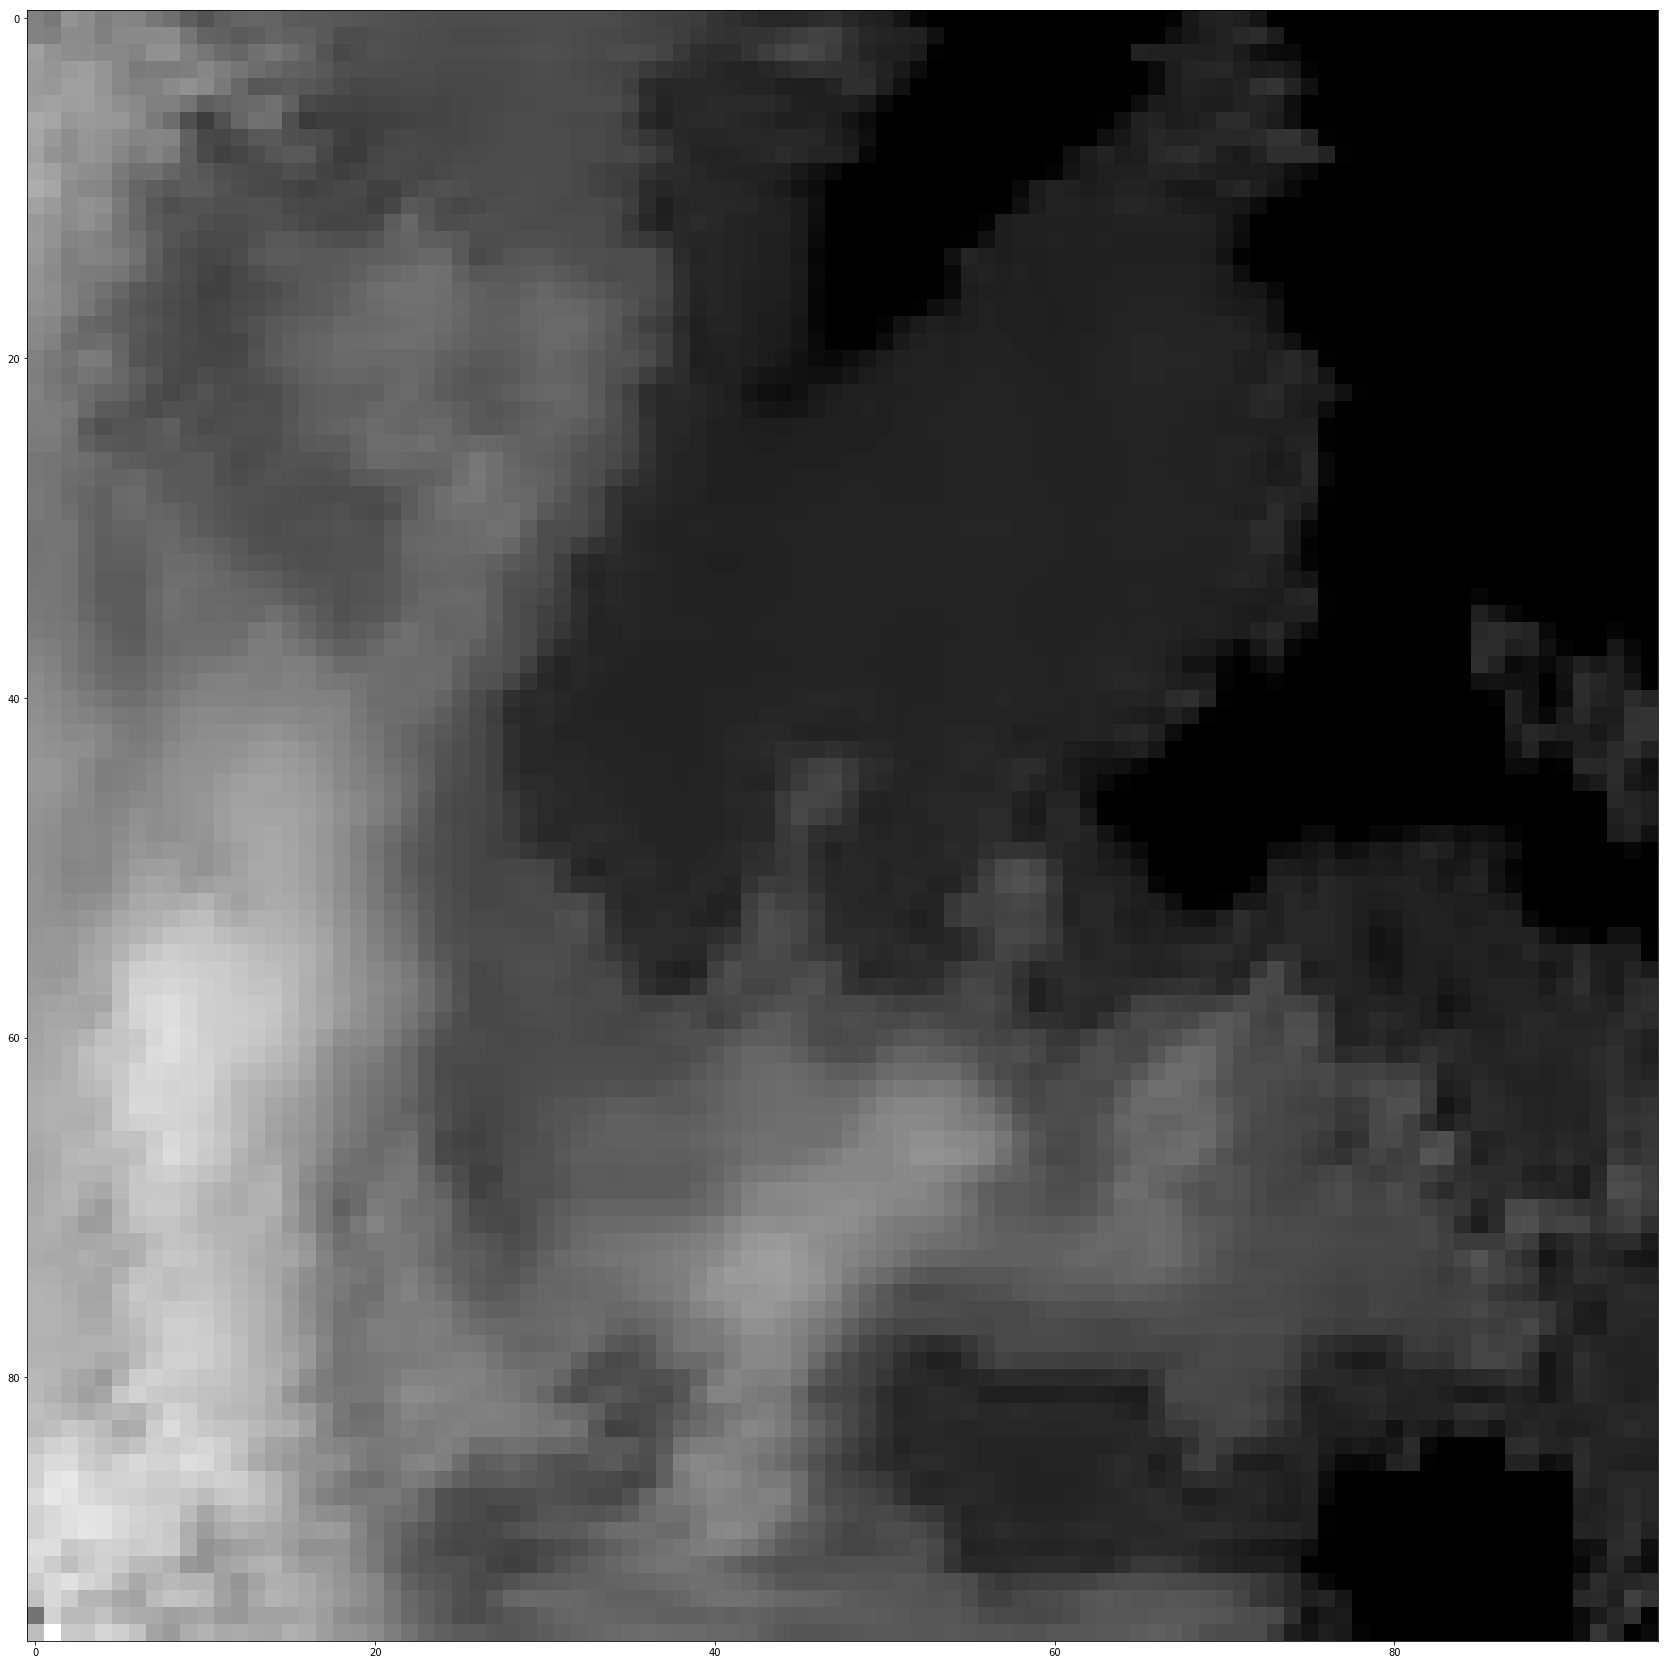

In [27]:
mt.showImgGC("",de.cpu().detach().numpy())

### Number of trainable parameters

In [6]:
import torch
import torch.nn as nn
import numpy as np

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.conv =  nn.Conv2d(2, 1, (3,3), (1,1), (1,1))
        
    def forward(self, x):
        x = self.conv(x)
        
        return x

model = Model()
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
params = sum([np.prod(p.size()) for p in model_parameters])
print(params)

19


### Comparison for Upsampling

In [3]:
import os
import cv2 as cv
import tools._my_tools as mt
import tools._dataset_tools as dt
f = "12/upsample_5/"

In [ ]:
folders = sorted(os.listdir(f))
for i in range(10):
    name = str(i).zfill(2)+".png"
    res = []
#     print(name)
    for folder in folders:
        file = f+folder+"/"+name
        print(file)
        
        img = cv.imread(file,cv.IMREAD_UNCHANGED)
        img = dt.cropImg(img,192,0,(96,96))
        res.append(img)
    mt.showImgGC(str(i).zfill(2),*res,folder=f)

In [ ]:
img = cv.imread(f+"03.png",cv.IMREAD_UNCHANGED)
res = []
for i in range(3):
    res.append(dt.cropImg(img,56+96*i,28,(40,40)))
mt.showImgGC("zoom",*res,folder=f)

In [ ]:
img = cv.imread(f+"03.png",cv.IMREAD_UNCHANGED)

### Plot CSV

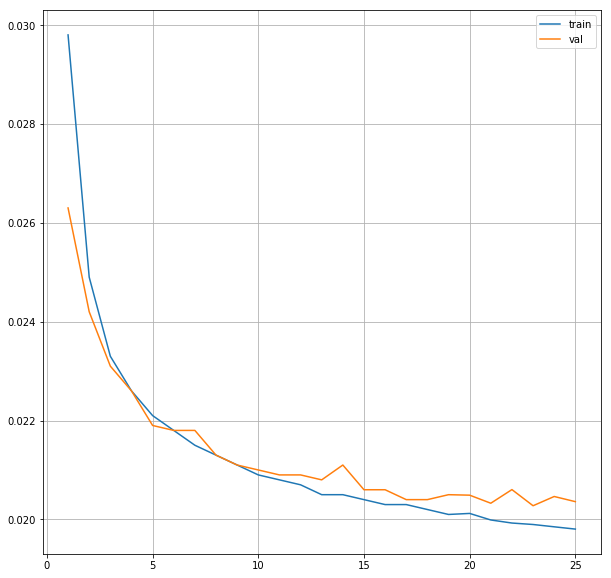

In [2]:
import tools._my_tools as mt
file = "16/history.csv"
a = mt.fromCSV(file)
mt.plotHistory(a,save="16/history.png")

### Splitting images

In [5]:
import tools._my_tools as mt
import tools._dataset_tools as dt
import cv2 as cv
folder = "../presentation/fig/inter/"
img = cv.imread(folder+"07.png",cv.IMREAD_UNCHANGED)
for i in range(4):
    mt.showImg(str(i),dt.cropImg(img,i*96,0,(96,96)),folder=folder)

### Extrapolation test to .png

In [7]:
import numpy as np
import cv2 as cv
import os
y = np.load("datasets/dataset_extrapolation/y_test.npy")

In [3]:
y.shape

(21130, 3, 96, 96)

In [5]:
y[47,0]

array([[ 85,  85, 102, ...,   0,   0,   0],
       [ 85, 102, 102, ...,   0,   0,   0],
       [102, 102, 102, ...,   0,   0,   0],
       ...,
       [ 51,  51,   0, ...,  51,  68,  68],
       [ 51,  51,  17, ...,  34,  34,  34],
       [ 34,  17,   0, ...,   0,   0,   0]], dtype=uint8)

In [11]:
x = np.load("datasets/dataset_extrapolation/X_test.npy")

In [12]:
folder = "datasets/test_png/input/"
print("start",end='',flush=True)
for i in range(x.shape[0]):
    if i % 100 == 0:
        print('\r'+str(i),end='',flush=True)
    f = str(i).zfill(5) + "/"
    os.mkdir(folder+f)
    for name in range(3):
        cv.imwrite(folder+f+str(name) + ".png",x[i,name])

21100

### SSIM of average

In [1]:
import tools._my_tools as mt
import models.loss as lo

x,y = mt.loadData("datasets/dataset_interpolation_96/",test=True,typeF='float16')

Loading datasets/dataset_interpolation_96/X_test.npy
Loading datasets/dataset_interpolation_96/y_test.npy


In [14]:
import torch
def computeAverage(i1, i2):
    return (i1 + i2) / 2

print("",end='',flush=True)
loss = 0
loss_func = lo.SSIMLoss()
for i in range(x.shape[0]):
    out = computeAverage(x[i,0],x[i,1])
    loss += loss_func(torch.tensor(out,dtype=torch.float).view(1,1,96,96),
                      torch.tensor(y[i:i+1],dtype=torch.float))
    print('\r'+str(i)+" "+str(loss/(i+1)),end='',flush=True)
#     mt.showImgGC("",x[i,0],out,x[i,1])
dummy_test_ssim = loss / x.shape[0]

44406 0.7469036573257388

In [15]:
dummy_test_ssim

0.7469036573257388